<a href="https://colab.research.google.com/github/theAkashPrabu/Dessertation/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
columns = [
    'Sex', 'Length', 'Diameter', 'Height',
    'WholeWeight', 'ShuckedWeight', 'VisceraWeight',
    'ShellWeight', 'Rings'
]

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/abalone/abalone.data', header=None, names=columns)
df.head()


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Shape: (4177, 9)

Data Types:
 Sex               object
Length           float64
Diameter         float64
Height           float64
WholeWeight      float64
ShuckedWeight    float64
VisceraWeight    float64
ShellWeight      float64
Rings              int64
dtype: object

Missing Values:
 Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
WholeWeight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
ShuckedWeight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
VisceraWeight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
ShellWeight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [ ]:
df['Sex'].value_counts()


,count
Sex,
M,1528
I,1342
F,1307


<Figure size 1200x800 with 0 Axes>

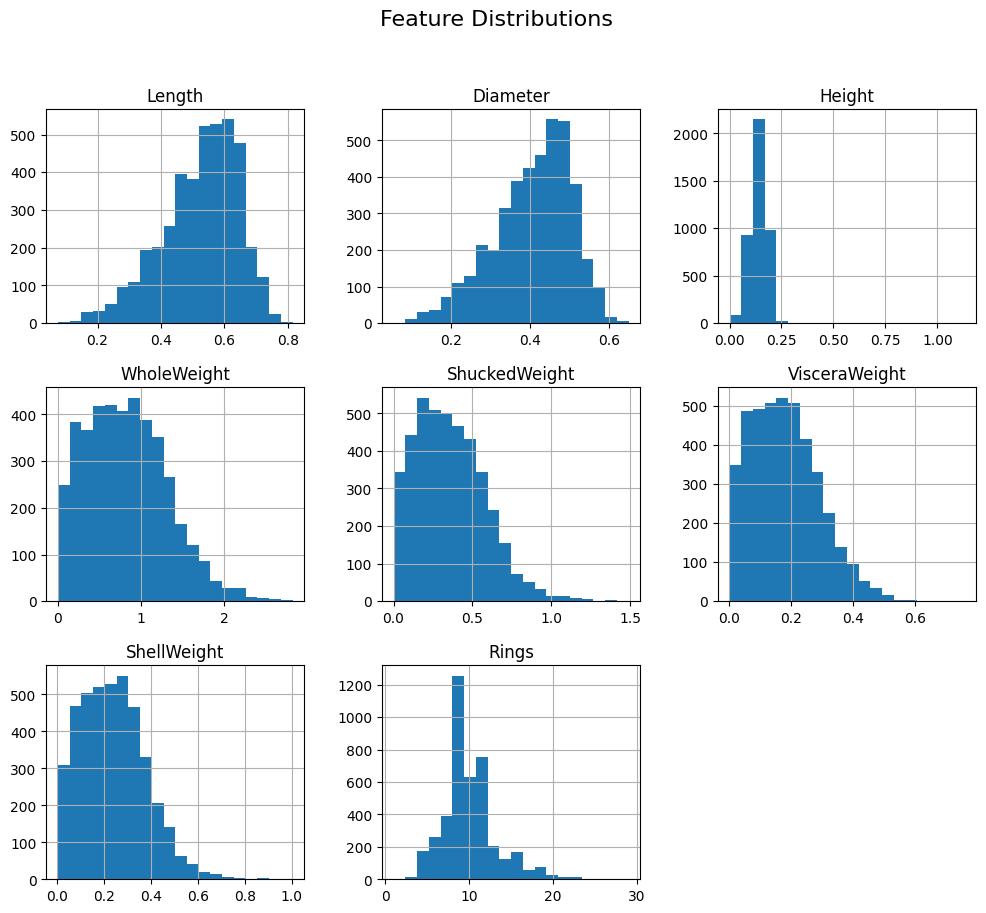

In [ ]:
plt.figure(figsize=(12,8))
df.hist(bins=20, figsize=(12,10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


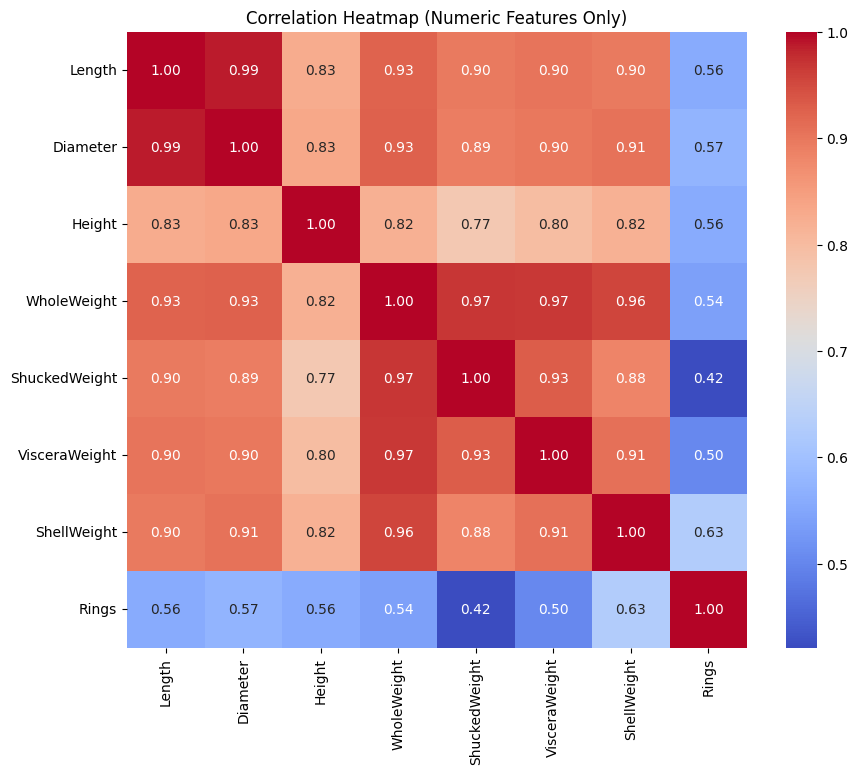

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


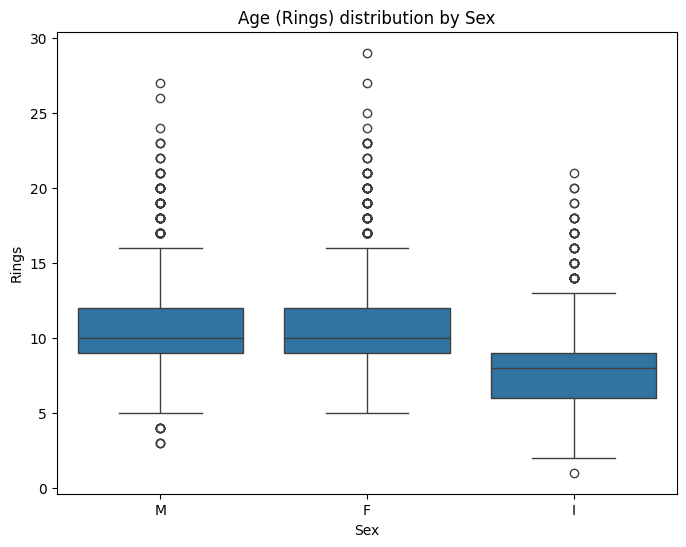

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Sex', y='Rings', data=df)
plt.title("Age (Rings) distribution by Sex")
plt.show()


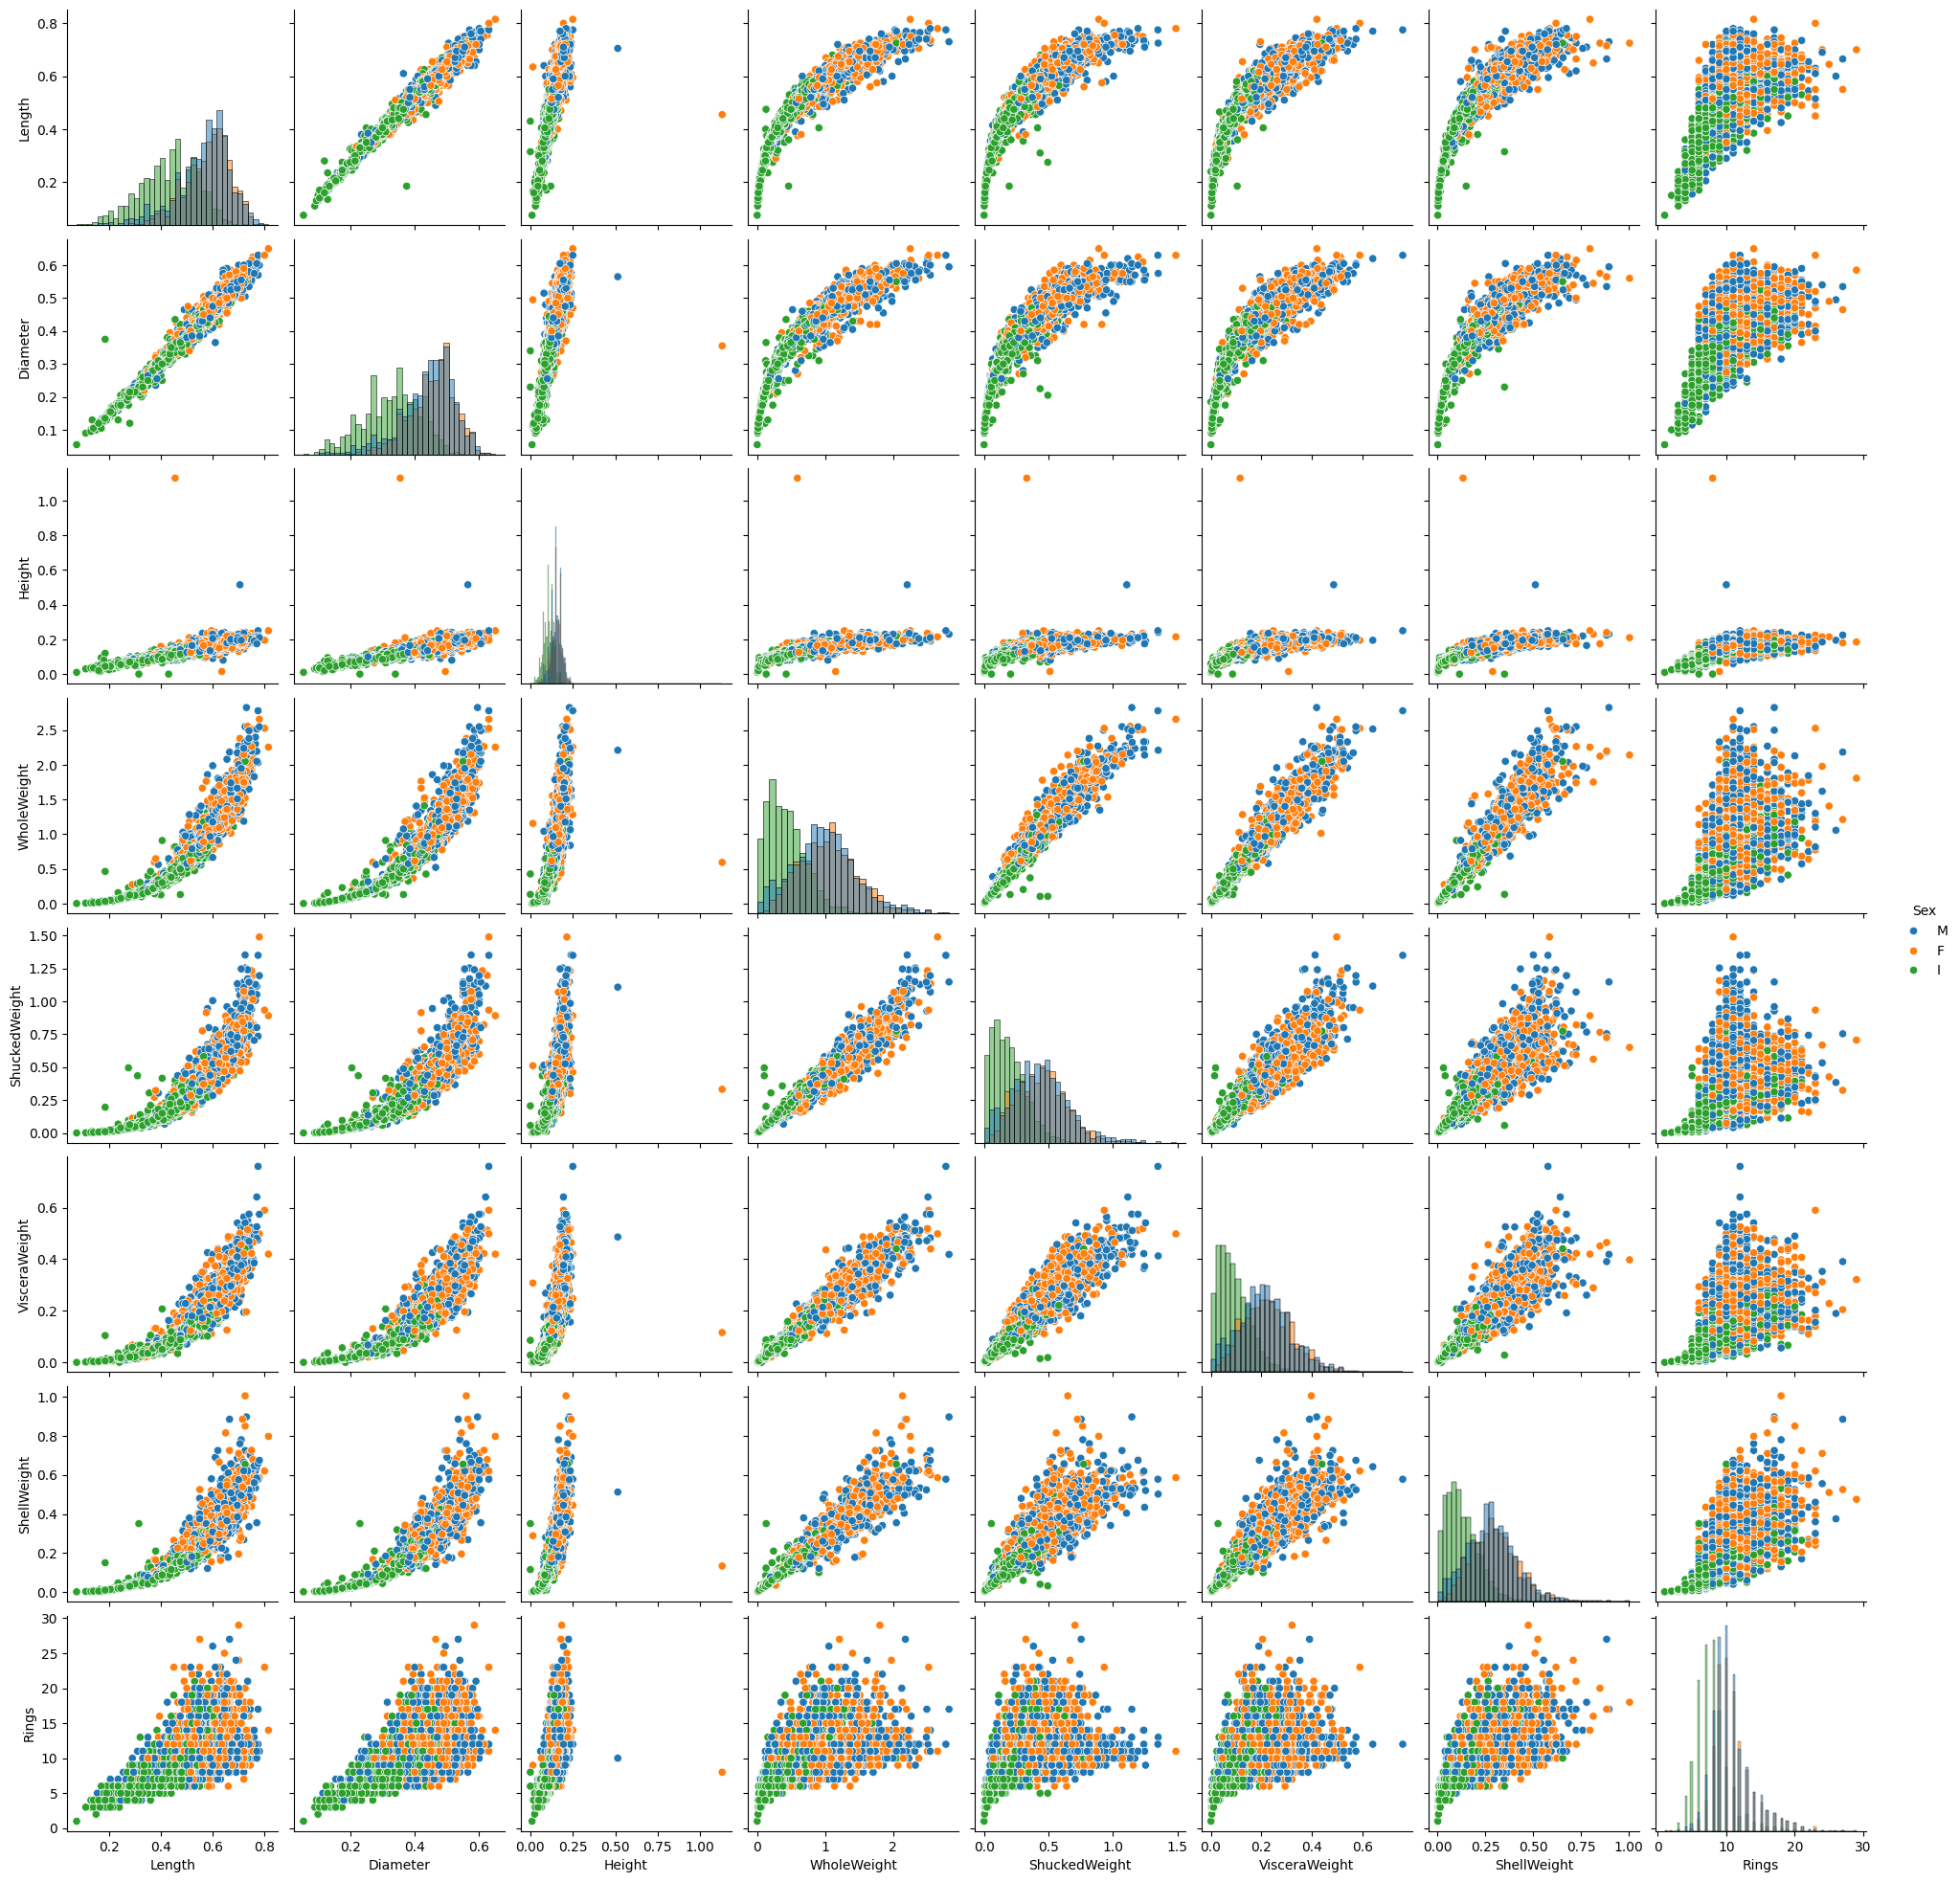

In [ ]:
sns.pairplot(df, hue='Sex', diag_kind='hist')


In [ ]:
df['Age'] = df['Rings'] + 1.5
df[['Rings', 'Age']].head()


,Rings,Age
0,15,16.5
1,7,8.5
2,9,10.5
3,10,11.5
4,7,8.5


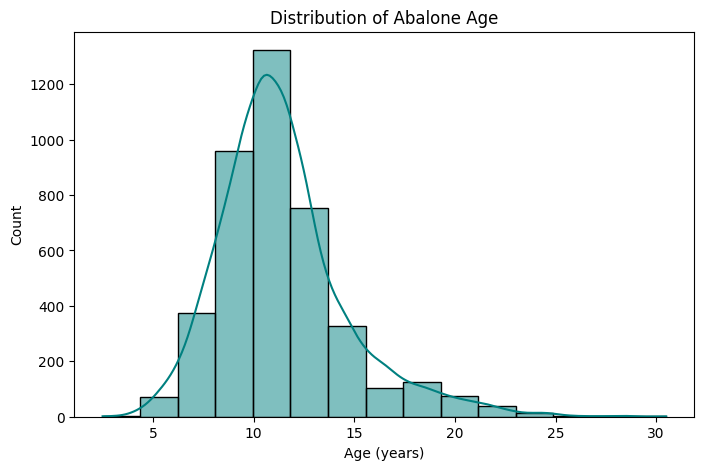

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=15, kde=True, color='teal')
plt.title('Distribution of Abalone Age')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()


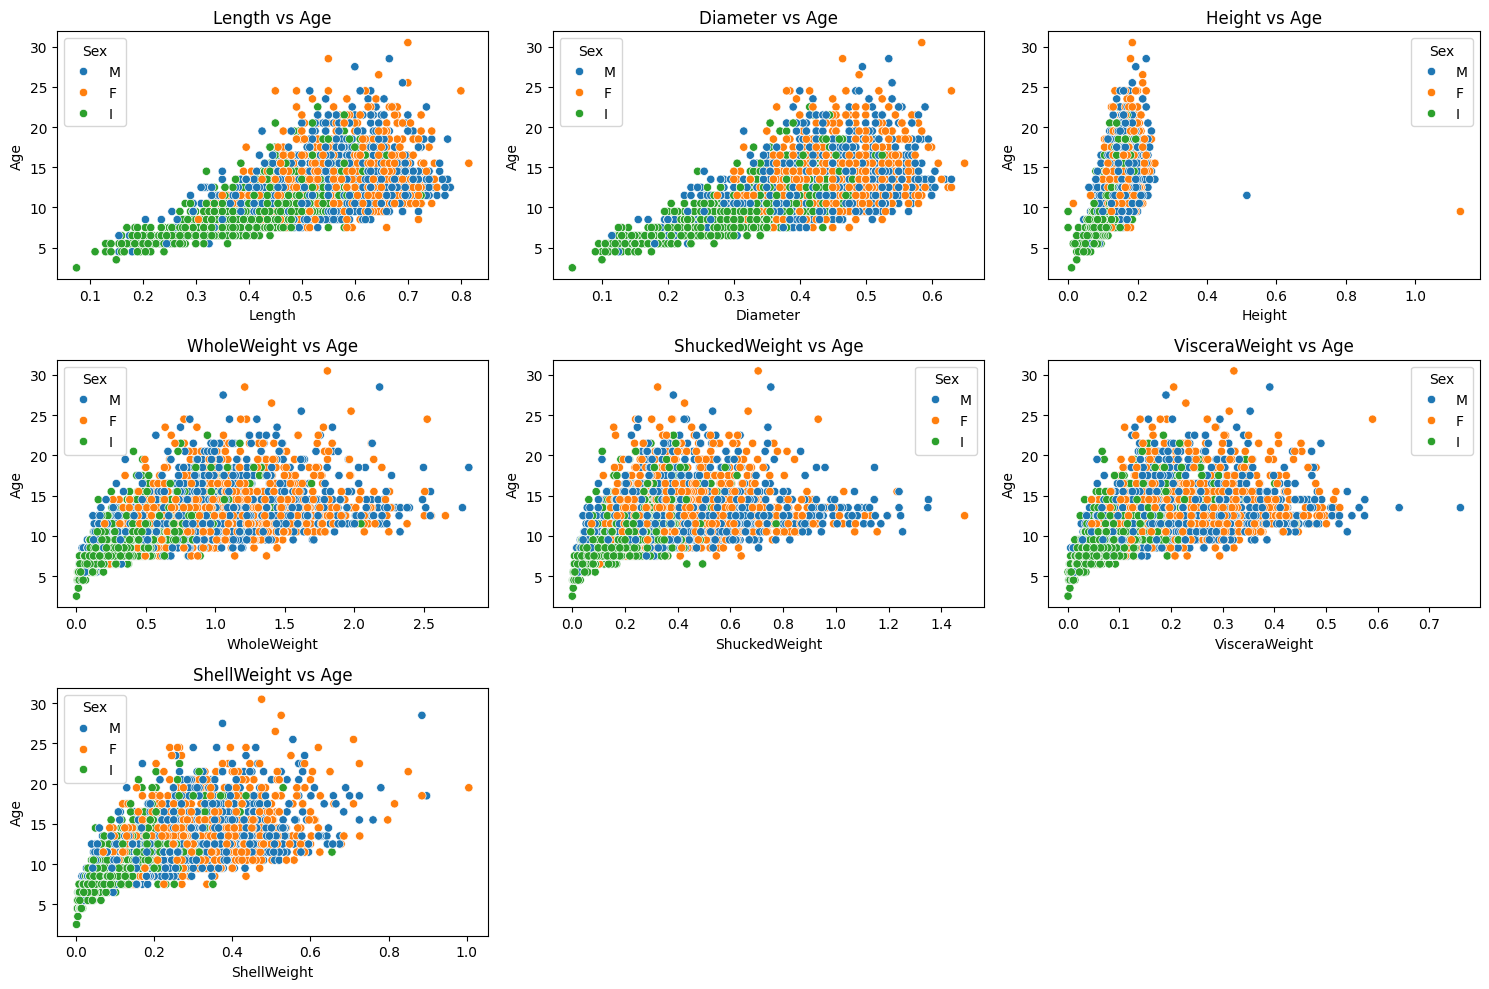

In [ ]:
features = ['Length', 'Diameter', 'Height',
            'WholeWeight', 'ShuckedWeight',
            'VisceraWeight', 'ShellWeight']


plt.figure(figsize=(15,10))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=col, y='Age', hue='Sex', data=df)
    plt.title(f'{col} vs Age')
plt.tight_layout()
plt.show()



In [ ]:
corr = df.corr(numeric_only=True)['Age'].sort_values(ascending=False)
print("Feature Correlation with Age:")
print(corr)


Feature Correlation with Age:
Rings            1.000000
Age              1.000000
ShellWeight      0.627574
Diameter         0.574660
Height           0.557467
Length           0.556720
WholeWeight      0.540390
VisceraWeight    0.503819
ShuckedWeight    0.420884
Name: Age, dtype: float64


,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Age
Sex,,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304,12.629304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497,12.205497


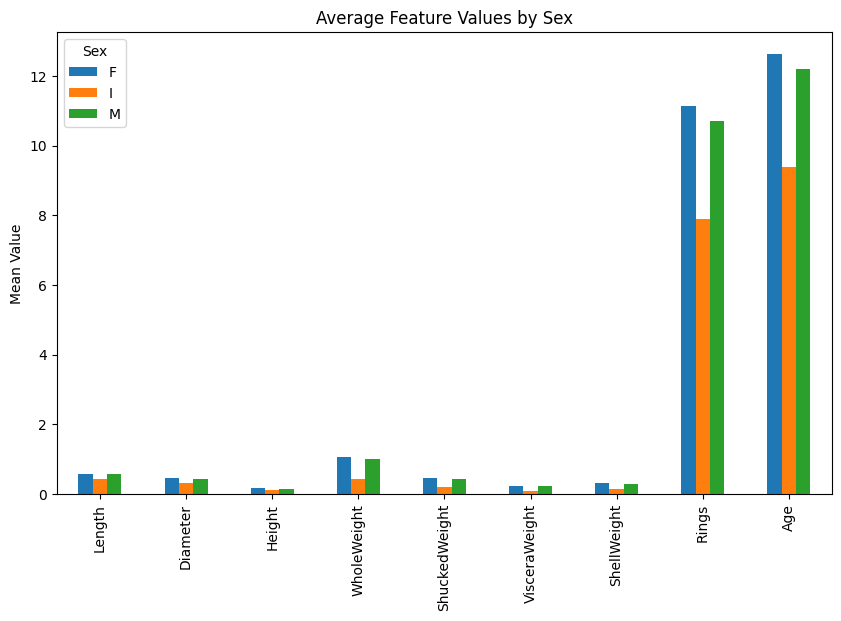

In [ ]:
group_summary = df.groupby('Sex').mean(numeric_only=True)
display(group_summary)
group_summary.T.plot(kind='bar', figsize=(10,6))
plt.title('Average Feature Values by Sex')
plt.ylabel('Mean Value')
plt.show()


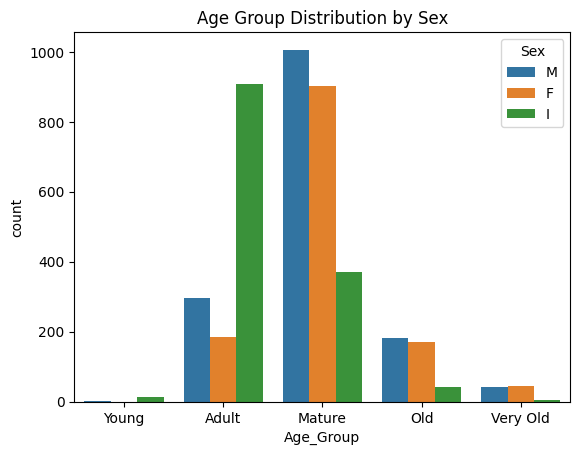

In [ ]:
bins = [0, 5, 10, 15, 20, 30]
labels = ['Young', 'Adult', 'Mature', 'Old', 'Very Old']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

sns.countplot(x='Age_Group', hue='Sex', data=df)
plt.title('Age Group Distribution by Sex')
plt.show()


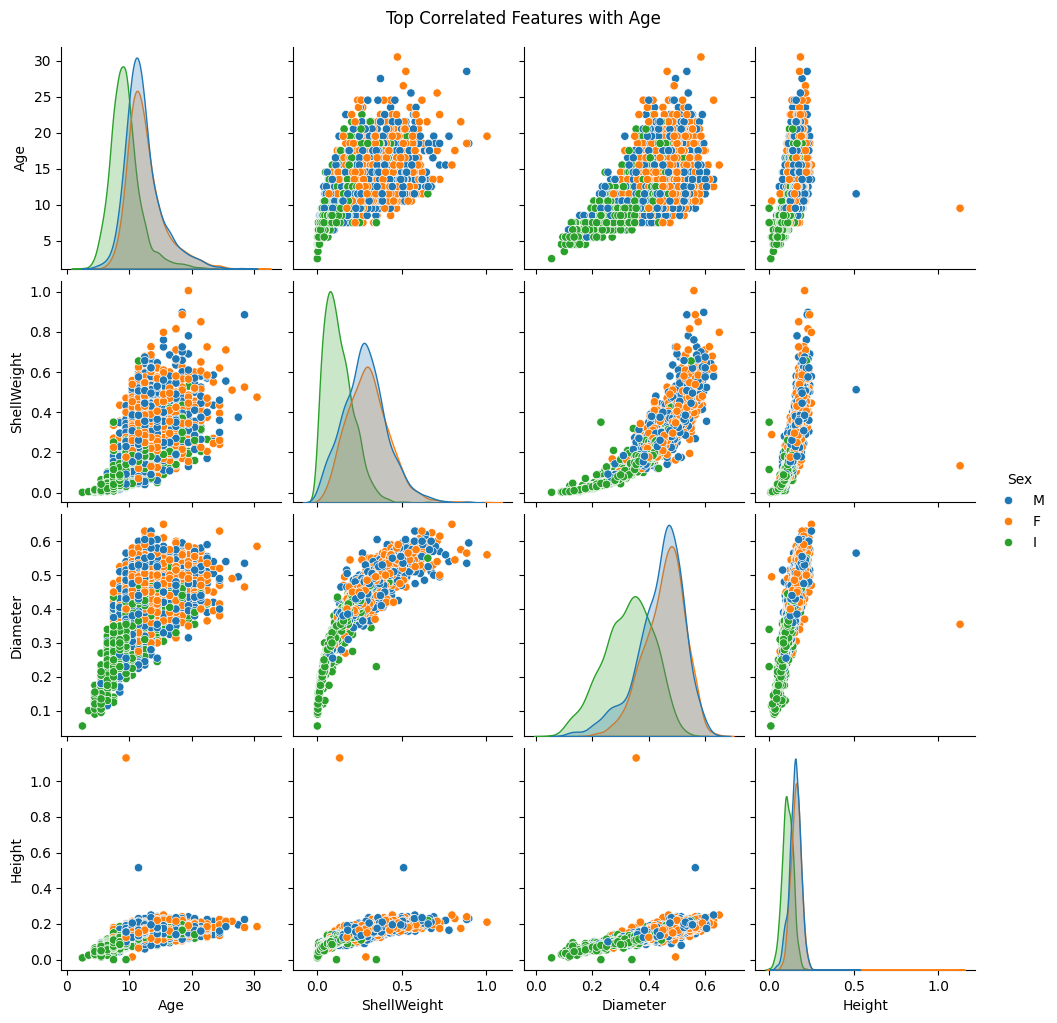

In [ ]:
top_features = corr[1:5].index  # top 4 correlated features
sns.pairplot(df, vars=top_features, hue='Sex', diag_kind='kde')
plt.suptitle('Top Correlated Features with Age', y=1.02)
plt.show()
